In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study analysis.csv')

In [33]:
df.head(10)

,study hour,test grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


In [47]:
datafarame=pd.DataFrame(df)

In [48]:
datafarame

,study hour,test grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


In [34]:
df.shape

(9, 2)

In [35]:
def linear(X,c,m):
  return [c+m*x for x in X]

In [36]:
def intercept(X,Y,m):
  x_=np.mean(X)
  y_=np.mean(Y)
  return y_-(m*x_)

In [37]:
def slope(X,Y):
  x_=np.mean(X)
  y_=np.mean(Y)
  rise=sum([(X-x_)*(Y-y_) for X,Y in zip(X,Y) ])
  run=sum([(X-x_)**2  for X,Y in zip(X,Y)])
  return rise/run

In [38]:
final_data=df[['study hour','test grade']]

In [39]:
predictor=final_data['study hour']
target=final_data['test grade']

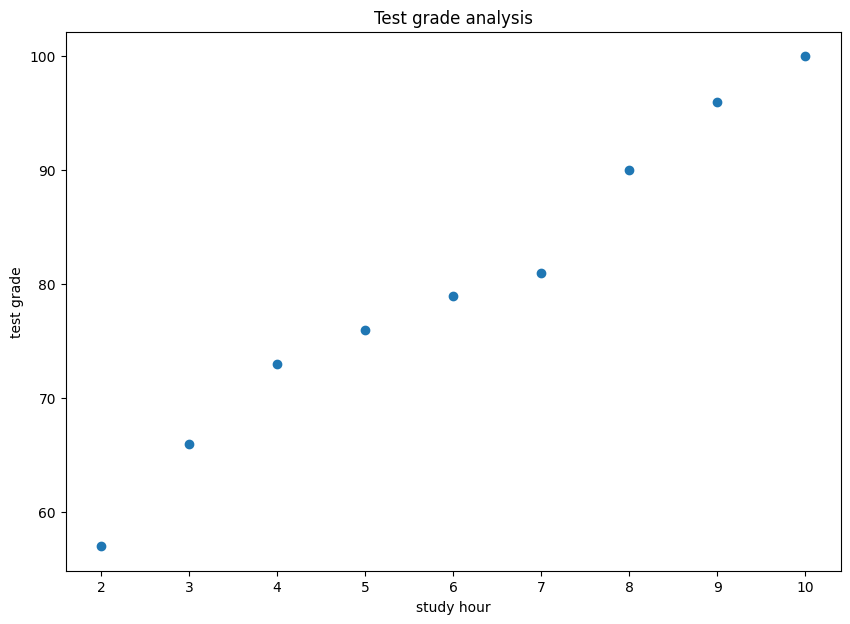

In [40]:
plt.figure(figsize=(10,7))
plt.title("Test grade analysis")
plt.xlabel("study hour")
plt.ylabel("test grade")

plt.scatter(predictor,target)

In [41]:
m=slope(predictor,target)
c=intercept(predictor,target,m)
predicted=linear(predictor,c,m)
print(predicted)

[np.float64(59.7111111111111), np.float64(64.72777777777777), np.float64(69.74444444444444), np.float64(74.7611111111111), np.float64(79.77777777777777), np.float64(84.79444444444444), np.float64(89.8111111111111), np.float64(94.82777777777777), np.float64(99.84444444444443)]


In [42]:
print("c:",c)
print("m:",m)

c: 49.67777777777777
m: 5.016666666666667


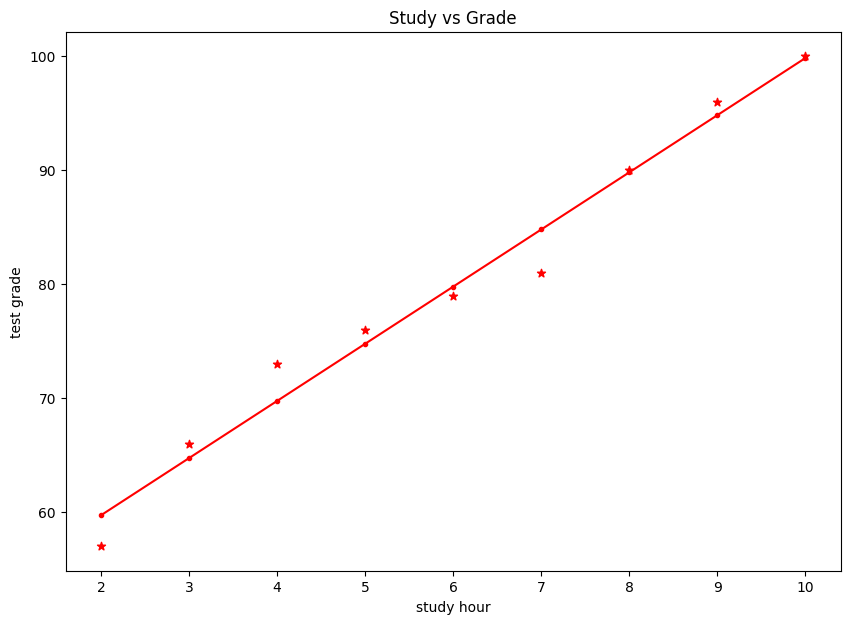

In [43]:
plt.figure(figsize=(10,7))
plt.title("Study vs Grade")

plt.xlabel("study hour")
plt.ylabel("test grade")

plt.scatter(predictor,target,color='red',marker='*')
plt.plot(predictor,predicted,color='red',marker='.')

<Axes: xlabel='study hour', ylabel='test grade'>

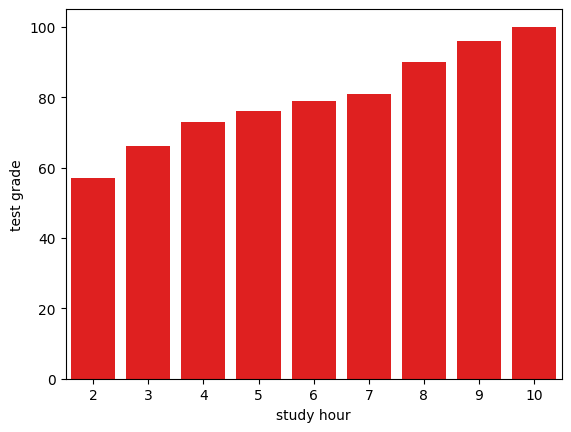

In [44]:
sns.barplot(df,x='study hour',y='test grade',color='red')

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
reg=LinearRegression()
predictor=np.array(predictor).reshape(-1,1)
reg=reg.fit(predictor,target)

y_pred=reg.predict(predictor)
r2_score=reg.score(predictor,target)
mse=mean_squared_error(target,y_pred)
mae=mean_absolute_error(target,y_pred)
print(r2_score)
print(mse)
print(mae)


0.9757431074095347
4.170987654320986
1.618518518518523
